In [31]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

Загружаем данные для обучения

In [51]:
df = pd.read_csv("mammals.csv", sep=',')
df

,id,body,brain
0,Arctic fox,3.385,44.5
1,Owl monkey,0.480,15.5
2,Mountain beaver,1.350,8.1
3,Cow,465.000,423.0
4,Grey wolf,36.330,119.5
...,...,...,...
57,Brazilian tapir,160.000,169.0
58,Tenrec,0.900,2.6
59,Phalanger,1.620,11.4
60,Tree shrew,0.104,2.5


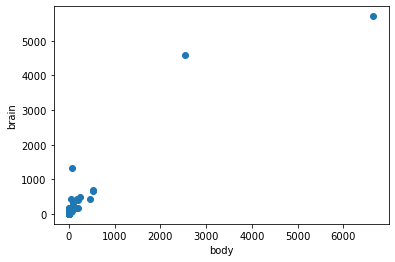

In [34]:
plt.scatter(body, brain)
plt.xlabel("body")
plt.ylabel("brain")
plt.show()

Получаем из данных значения для обучения

In [53]:
body = df['body'].values # Масса тела 
brain = df['brain'].values # Масса мозга
names = df['id'].values

In [54]:
X = body_log = np.log(body) # Логарифмируем признаки 
# для преобразования сильно перекошенных переменных в нормализованный набор данных
Y = brain_log = np.log(brain)

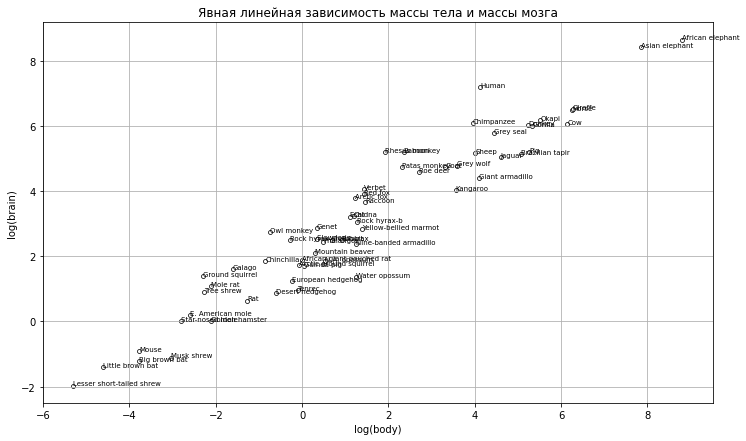

In [58]:
plt.figure(figsize=(12,7))
plt.scatter(body_log, brain_log, s=16, c='w', edgecolors='k', linewidth=0.75)
plt.xlabel('log(body)')
plt.ylabel('log(brain)')
plt.title("Явная линейная зависимость массы тела и массы мозга") # Поэтому можем попробовать использовать линейную регрессию

for name, x, y in zip(names, body_log, brain_log):
    plt.text(x, y, name, fontsize=7)

plt.grid(1)
plt.show()

In [59]:
from mltools.estimators import LinearLS # Класс обучения линейной регрессии

In [70]:
regr_ls = LinearLS()
regr_ls.fit(X[:,None], Y)
mod_ls = regr_ls.model
print(mod_ls.param)

[2.13478868 0.75168594]


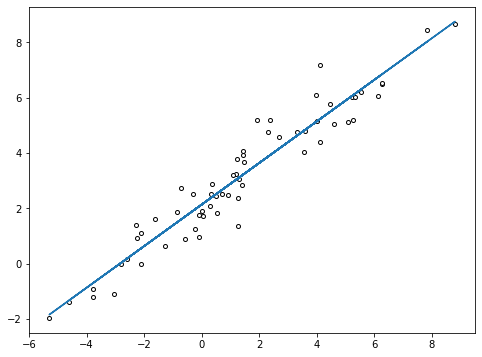

In [39]:
plt.figure(figsize=(8,6))
plt.scatter(X, Y, s=16, c='w', edgecolors='k')
plt.plot(X, mod_ls.evaluate(X[:,None]))
plt.show()

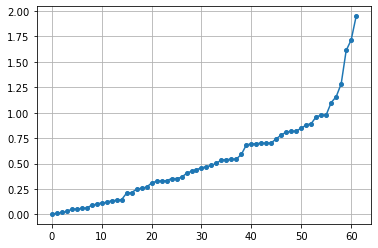

In [40]:
# Находим выбросы в данных
E = abs(mod_ls.evaluate(X[:,None]) - Y)

plt.plot(sorted(E), marker='o', markersize=4)
plt.grid(1)
plt.show()

In [72]:
from mltools.scores import modified_zscore

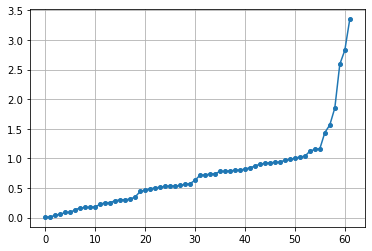

In [73]:
N = len(E)
Z = abs(modified_zscore(E))
plt.plot(sorted(Z), marker='o', markersize=4)
plt.grid(1)
plt.show()

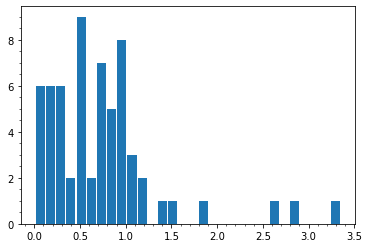

In [74]:
plt.hist(Z, bins=30, rwidth=0.9)
plt.minorticks_on()
plt.show()

In [75]:
z_ind = np.argsort(Z)
X1 = X[z_ind[:-3]]
Y1 = Y[z_ind[:-3]]
print(names[z_ind[:-3]])
print(names[z_ind[-3:]])

['Guinea pig' 'Genet' 'Tree shrew' 'Raccoon' 'Big brown bat' 'Roe deer'
 'Asian elephant' 'Rat' 'Jaguar' 'Golden hamster' 'Mole rat' 'Chinchilla'
 'Yellow-bellied marmot' 'Horse' 'Rock hyrax-a' 'Arctic ground squirrel'
 'Rabbit' 'Giraffe' 'Grey seal' 'Mountain beaver' 'Echidna'
 'African giant pouched rat' 'Galago' 'N.A. opossum'
 'Nine-banded armadillo' 'European hedgehog' 'Red fox' 'Cow' 'Mouse' 'Cat'
 'Arctic fox' 'Kangaroo' 'Tree hyrax' 'Slow loris' 'Gorilla'
 'Desert hedgehog' 'Lesser short-tailed shrew' 'Goat' 'Giant armadillo'
 'Brazilian tapir' 'African elephant' 'Okapi' 'Verbet' 'Phalanger'
 'Little brown bat' 'Rock hyrax-b' 'Grey wolf' 'Patas monkey' 'Pig'
 'Donkey' 'Star-nosed mole' 'Sheep' 'E. American mole' 'Musk shrew'
 'Ground squirrel' 'Chimpanzee' 'Tenrec' 'Owl monkey' 'Baboon']
['Rhesus monkey' 'Water opossum' 'Human']


In [76]:
def fit_model(X, Y):
    rg = LinearLS()
    rg.fit(X, Y)
    return rg.model
    
mod_ls1 = fit_model(X1[:,None], Y1)
print(mod_ls1.param)

[2.117984   0.74040756]


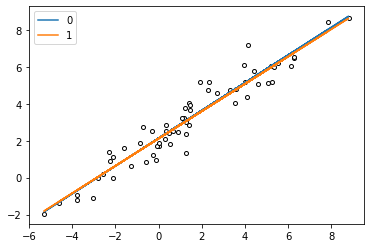

In [77]:
plt.scatter(X, Y, s=16, c='w', edgecolors='k')
plt.plot(X, mod_ls.evaluate(X[:,None]), label='0')
plt.plot(X, mod_ls1.evaluate(X[:,None]), label='1')
plt.legend()
plt.show()

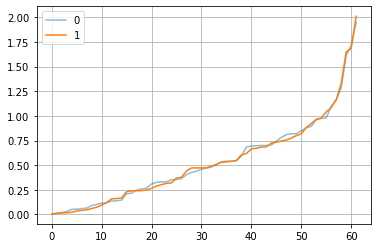

In [78]:
E1 = abs(Y - mod_ls1.evaluate(X[:,None]))

plt.plot(sorted(E), label='0', alpha=0.5)
plt.plot(sorted(E1), label='1')
plt.grid(1)
plt.legend()
plt.show()

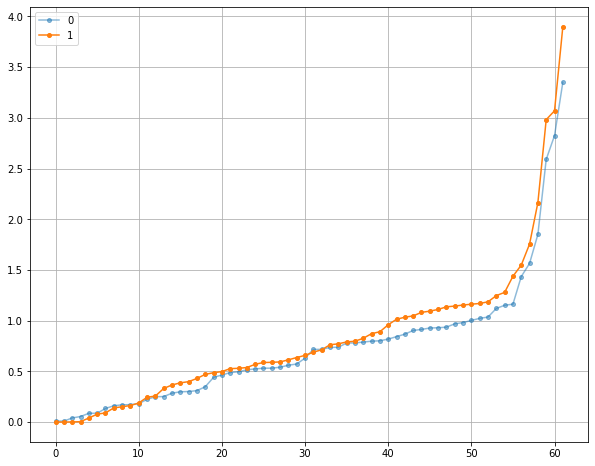

In [48]:
plt.figure(figsize=(10, 8))
Z1 = abs(modified_zscore(abs(E1)))
plt.plot(sorted(Z), marker='o', markersize=4, label='0', alpha=0.5)
plt.plot(sorted(Z1), marker='o', markersize=4,  label='1')
# for i in range(-1, -8, -1):
#     plt.text(N-i, Z1[i], names[i])

plt.grid(1)
plt.legend()
plt.show()

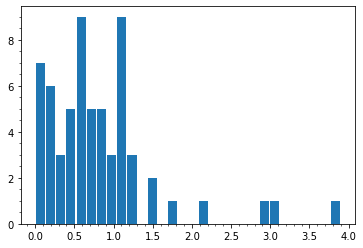

In [49]:
plt.hist(Z1, bins=30, rwidth=0.9)
plt.minorticks_on()
plt.show()

# Домашняя работа №1

In [79]:
# Посмотрим на данные
df = pd.read_csv("animals.csv", sep=',')
df

,name,body,brain
0,Mountain beaver,1.350,8.1
1,Cow,465.000,423.0
2,Grey wolf,36.330,119.5
3,Goat,27.660,115.0
4,Guinea pig,1.040,5.5
5,Dipliodocus,11700.000,50.0
6,Asian elephant,2547.000,4603.0
7,Donkey,187.100,419.0
8,Horse,521.000,655.0
9,Potar monkey,10.000,115.0


<Axes: title={'center': 'Распределение массы тела = body'}>

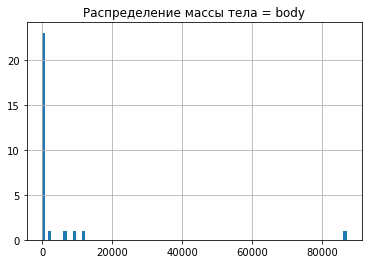

In [98]:
body = df['body'].values # Масса тела 
brain = df['brain'].values # Масса мозга
names = df['name'].values

plt.title("Распределение массы тела = body")
df['body'].hist(bins=100)

Видим, что есть выброс в данных: когда большая часть значений менее 20.000, а одно значение более 80.000. 

<Axes: title={'center': 'Распределение массы мозга = brain'}>

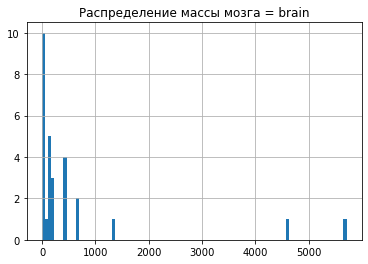

In [100]:
plt.title("Распределение массы мозга = brain")
df['brain'].hist(bins=100)

Аналогично видим, что есть два выброса с массой мозга: когда большая часть значений менее 1.500.

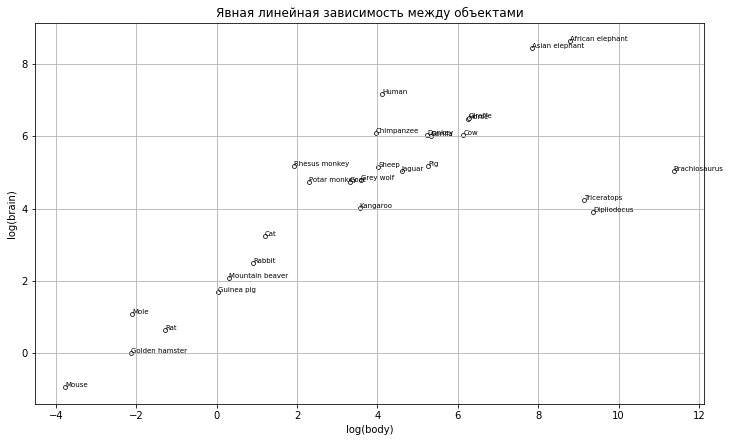

In [106]:
X = body_log = np.log(body) # Логарифмируем признаки 
# для преобразования сильно перекошенных переменных в нормализованный набор данных
Y = brain_log = np.log(brain)


plt.figure(figsize=(12,7))
plt.scatter(body_log, brain_log, s=16, c='w', edgecolors='k', linewidth=0.75)
plt.xlabel('log(body)')
plt.ylabel('log(brain)')
plt.title("Явная линейная зависимость между объектами")
for name, x, y in zip(names, body_log, brain_log):
    plt.text(x, y, name, fontsize=7)
    
plt.grid(1) # добавим сетку на график
plt.show()

Видим, что есть линейная зависимость, которая явно прослеживается, одна есть 3 больших выбороса - просто глядя на график. От них нужно избавиться, чтобы модель могла обучаться на обычных (часто встречающихся) данных и делать на основе них более правильные прогнозы (ошибка миниимальна). 

In [107]:
regr_ls = LinearLS()
regr_ls.fit(X[:,None], Y)
mod_ls = regr_ls.model
print(mod_ls.param)

[2.55489813 0.49599469]


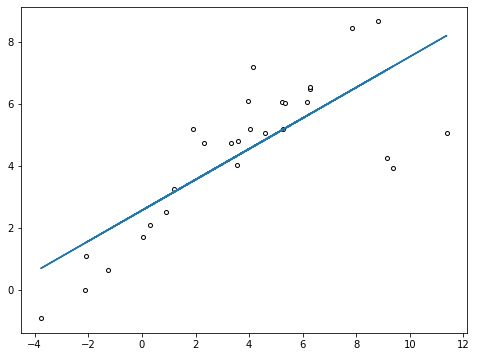

In [108]:
plt.figure(figsize=(8,6))
plt.scatter(X, Y, s=16, c='w', edgecolors='k')
plt.plot(X, mod_ls.evaluate(X[:,None]))
plt.show()

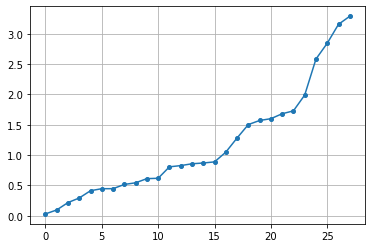

In [109]:
E = abs(mod_ls.evaluate(X[:,None]) - Y) # Массив ошибок

plt.plot(sorted(E), marker='o', markersize=4)
plt.grid(1)
plt.show()

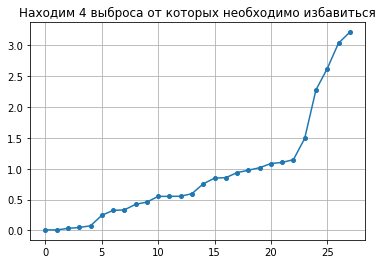

In [111]:
from mltools.scores import modified_zscore # Приведем к стандартным значениям 
N = len(E)
Z = abs(modified_zscore(E))
plt.plot(sorted(Z), marker='o', markersize=4)
plt.grid(1)
plt.title("Находим 4 выброса от которых необходимо избавиться")
plt.show()

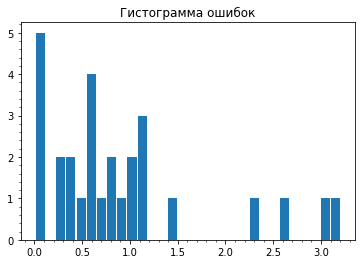

In [128]:
plt.hist(Z, bins=30, rwidth=0.9)
plt.title("Гистограмма ошибок")
plt.minorticks_on()
plt.show()

In [161]:
z_ind = np.argsort(Z)
# Избавляемся от выбросов 
X1 = X[z_ind[:-4]]
Y1 = Y[z_ind[:-4]]
print(names[z_ind[:-4]])
print(names[z_ind[-4:]])

['Guinea pig' 'Giraffe' 'Donkey' 'Horse' 'Gorilla' 'Potar monkey' 'Sheep'
 'Mountain beaver' 'Goat' 'Rabbit' 'Grey wolf' 'Cow' 'Rat' 'Mole'
 'Kangaroo' 'Golden hamster' 'Jaguar' 'Chimpanzee' 'Mouse' 'Cat'
 'Rhesus monkey' 'Pig' 'African elephant' 'Asian elephant']
['Human' 'Triceratops' 'Brachiosaurus' 'Dipliodocus']


In [162]:
def fit_model(X, Y):
    rg = LinearLS()
    rg.fit(X, Y)
    return rg.model

# "Обучаем" для данных с выбросами
mod_l = fit_model(X[:,None], Y)
print(mod_l.param)
   
# "Обучаем" модель для данных без выбросов
mod_l1 = fit_model(X1[:,None], Y1)
print(mod_l1.param)

# Видим заметное изменение в параметрах старой и новой модели 

[2.55489813 0.49599469]
[2.0962586  0.74345084]


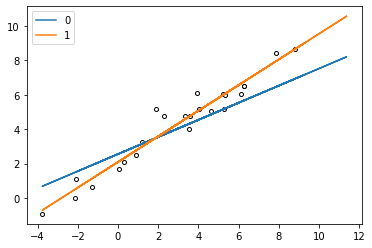

In [163]:
# Видим, заметное изменение на графике (без выбросов будет прогноз лучше)
plt.scatter(X1, Y1, s=16, c='w', edgecolors='k')
plt.plot(X, mod_l.evaluate(X[:,None]), label='0')
plt.plot(X, mod_l1.evaluate(X[:,None]), label='1')
plt.legend()
plt.show()

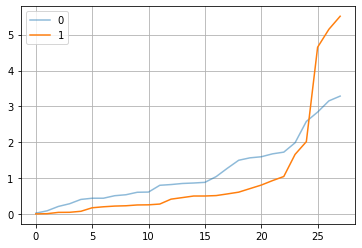

In [164]:
E1 = abs(Y - mod_l1.evaluate(X[:,None]))

plt.plot(sorted(E), label='0', alpha=0.5)
plt.plot(sorted(E1), label='1')
plt.grid(1)
plt.legend()
plt.show()

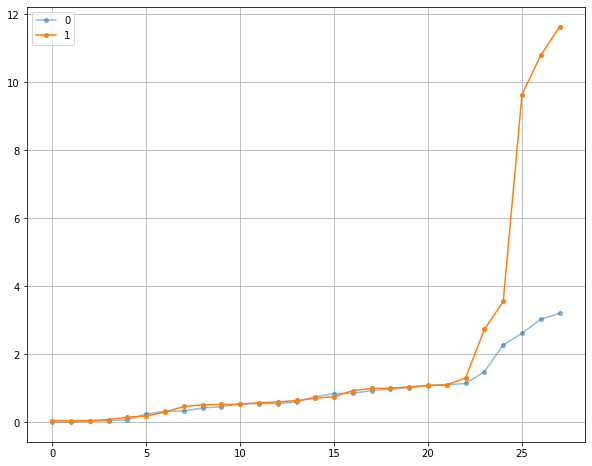

In [166]:
plt.figure(figsize=(10, 8))
Z1 = abs(modified_zscore(abs(E1)))
plt.plot(sorted(Z), marker='o', markersize=4, label='0', alpha=0.5)
plt.plot(sorted(Z1), marker='o', markersize=4,  label='1')

plt.grid(1)
plt.legend()
plt.show()